In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
from scipy.stats import skewnorm
from scipy.special import erfc
from scipy.integrate import quad

In [2]:
def emg(x, A, mu, sigma, tau):
    """Exponentially Modified Gaussian"""
    z = (x - mu) / sigma
    return A * (tau / 2) * np.exp((sigma ** 2) / (2 * tau ** 2) - z / tau) * erfc((sigma / np.sqrt(2) * tau) - (z / np.sqrt(2)))

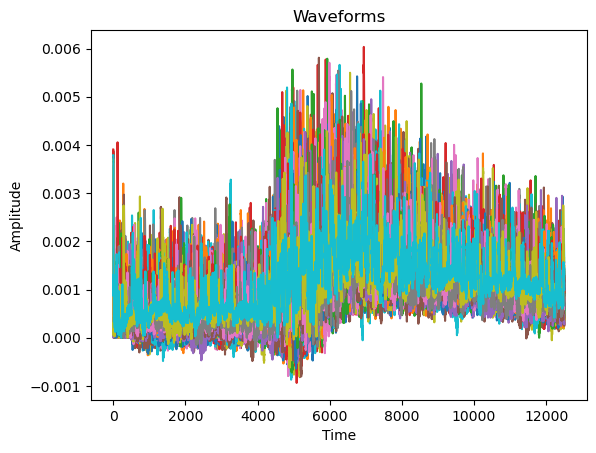

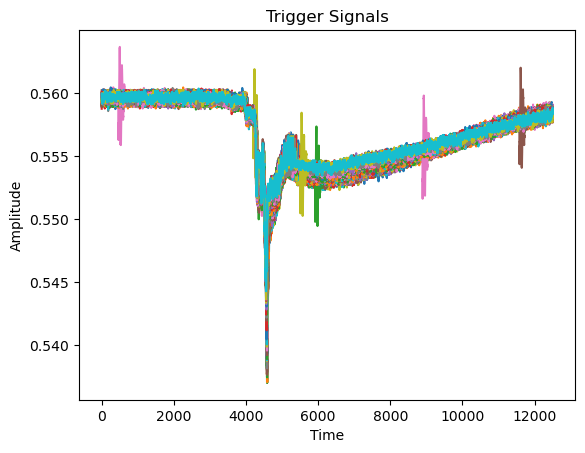

In [3]:
def read_data(filename, seg_len):
    filepath = "C:/Users/louis/OneDrive/Documents/University of Manchester/Physics/Year 4/MPhys/data/MPhys Sem 1 SiPM-Scintillation (KeySight Oscilloscope)/"
    data = np.genfromtxt(filepath + filename, delimiter=',', skip_header=3)
    n_segs = len(data) // seg_len

    waveforms = np.zeros((n_segs, seg_len, 3))
    for i in range(n_segs):
        waveforms[i] = data[i*seg_len:(i+1)*seg_len]

    np.nan_to_num(waveforms[:,:,2], copy=False, nan=0)

    for waveform in waveforms:
        waveform[:,2] += np.abs(np.min(waveform[:,2][0:500]))
        plt.plot(waveform[:, 2])

    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Waveforms")
    #plt.xlim(5800,6400)
    plt.show()

    for waveform in waveforms:
        plt.plot(waveform[:, 1])

    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Trigger Signals")
    #plt.xlim(5800,6400)
    plt.show()

    return waveforms, n_segs

waveforms1200, n_segs1200 = read_data("1200V_Ar_VUV_SiPM (06,12,2024).csv", 12500)

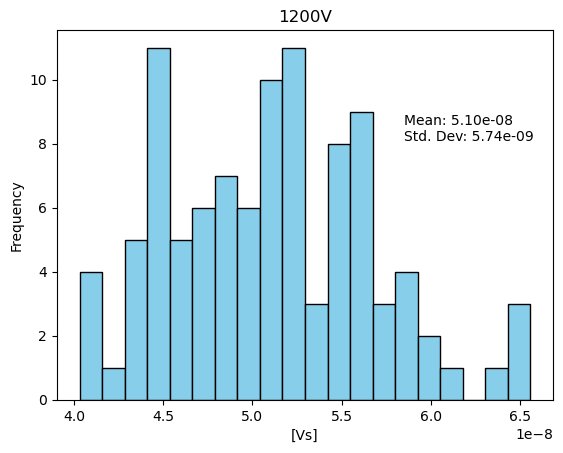

[5.23491510876755e-08,
 5.2143223533538285e-08,
 5.663527664869885e-08,
 4.494341686042003e-08,
 5.616606304148776e-08,
 4.1244592077906986e-08,
 4.433750567081666e-08,
 5.724168626150793e-08,
 4.454893721392117e-08,
 5.520110912815035e-08,
 5.106993103398875e-08,
 5.163246755496128e-08,
 5.439212899766893e-08,
 4.7193799448198284e-08,
 4.3342575872331174e-08,
 4.87028563952406e-08,
 4.4224278508432945e-08,
 4.947346902322896e-08,
 5.221024306279744e-08,
 4.558154732644078e-08,
 5.035220623490535e-08,
 4.979119343262157e-08,
 4.9096825222479464e-08,
 4.885215620665605e-08,
 4.9910413200639484e-08,
 5.95581554261332e-08,
 4.691353455359305e-08,
 5.093767197028633e-08,
 5.337458617698512e-08,
 5.810435336268833e-08,
 4.3095031342871184e-08,
 5.11622953694168e-08,
 5.325252576633214e-08,
 4.582362852831326e-08,
 4.8021871607207546e-08,
 5.243092409697322e-08,
 5.7199961511557535e-08,
 5.0234188451308126e-08,
 4.580476226769843e-08,
 4.4216516254555784e-08,
 5.105212089652964e-08,
 4.48385

In [7]:
def integrate(waveforms, n_segs):
    areas = []  # Store the area for each waveform

    for i in range(n_segs):
        # Extract x and y data for the current waveform
        x_data = waveforms[i, :, 0]
        y_data = waveforms[i, :, 2]

        # Initial guesses for the EMG fit
        initial_guess = [0.003, x_data[np.argmax(y_data)], 1e-5, 1]

        # Fit the EMG model
        params, _ = curve_fit(emg, x_data, y_data, p0=initial_guess, maxfev=20000)

        # Integrate the EMG model over the range of x_data
        area, _ = quad(emg, x_data[0], x_data[-1], args=tuple(params))
        areas.append(area)

        # Optional: Plot individual fits (uncomment for debugging)
        #fitted_peak = emg(x_data, *params)
        #plt.plot(x_data, y_data, '.', label="Noisy Data")
        #plt.plot(x_data, fitted_peak, label="Fitted EMG", linewidth=2)
        #plt.legend()
        #plt.show()

    mean = np.mean(areas)
    std_dev = np.std(areas)

    # Plot a histogram of the areas
    plt.hist(areas, bins=20, color='skyblue', edgecolor='black')
    plt.title("1200V")
    plt.xlabel("[Vs]")
    plt.ylabel("Frequency")
    plt.annotate(f"Mean: {mean:.2e}\nStd. Dev: {std_dev:.2e}", xy=(0.7, 0.7), xycoords='axes fraction')
    plt.show()

    return areas

integrate(waveforms1200, n_segs1200)